In [20]:
from LaviRot import *
import numpy as np
import scipy as sp
import scipy.linalg as la
from matplotlib import use
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
np.set_printoptions(precision=1, linewidth=300)
%matplotlib inline
use('nbagg')

C:\Users\Rebeca André\Anaconda3\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [21]:
E = 203e9
Gs = 78.12e9
rho = 7860

In [22]:
si_d = 0
so_d = 0.1016
cte = 28665*(10**(-5))

In [23]:
L =     [0.37*cte, 
         0.35*cte,
         0.32*cte, 
         0.84*cte,
         0.17*cte,
         0.13*cte,
         0.17*cte,
         0.18*cte,
         0.38*cte,
         0.46*cte,
         0.31*cte,
         0.38*cte,
         0.31*cte,
         0.10*cte,
         0.32*cte,
         0.12*cte]

In [24]:
nelem = [x for x in range(len(L))]

In [25]:
shaft_elem = [ShaftElement(n, l, si_d, so_d, E, Gs, rho,
                           shear_effects=True,
                           rotary_inertia=True,
                           gyroscopic=True) for n, l in zip(nelem, L)]

In [26]:
shaft_elem1 = shaft_elem[0]

In [27]:
colar = DiskElement(14,rho, cte*0.10, so_d, cte*0.54)
disk0 = DiskElement(5, rho, cte*0.17, so_d, cte*0.62)
disk1 = DiskElement(7, rho, cte*0.17, so_d, cte*0.62)
disk2 = DiskElement(9, rho, cte*0.38, so_d, cte*1.02)

In [28]:
kx0 = 1.27106e8
ky0 = 1.23604e8
cx0 = 1.33615e8
cy0 = 1.31591e8
kx1 = 1.28980e8
ky1 = 1.24296e8
cx1 = 1.34763e8
cy1 = 1.32003e8
bearing0 = BearingElement(2, kxx=kx0,cxx=cx0,kyy=ky0,cyy=cy0)
bearing1 = BearingElement(12,kxx=kx1,cxx=cx1,kyy=ky1,cyy=cy1)

In [29]:
turbine = Rotor(shaft_elem,
                   [colar, disk0, disk1, disk2],
                   [bearing0, bearing1])

In [30]:
speed = np.linspace(0, 4000, 10)

In [31]:
M = turbine.M()
G = turbine.G()
C = turbine.C()
K = turbine.K()
I = sp.eye(len(M))
Z = sp.zeros_like(M)
Minv = la.inv(M)

In [32]:
len(M)

68

In [33]:
def mt(n):
    M0 = M[n*4:n*4+4,n*4:n*4+4]
    K0 = K[n*4:n*4+4,n*4:n*4+4]
    G0 = G[n*4:n*4+4,n*4:n*4+4]
    C0 = C[n*4:n*4+4,n*4:n*4+4]
    I = sp.eye(len(M0))
    Z = sp.zeros_like(M0)
    Minv = la.inv(M0)
    return M0 , K0, G0, C0, I, Z, Minv

In [34]:
def Fr(mi,ta,O):
    h = sp.linspace(0,(len(M)/4)-1,(len(M)/4)) 
    F = []
    for n in h:
        m = mt(n)[0][0,0]
        Id = mt(n)[0][2,2]
        Ip = mt(n)[2][2,3]
        for i in sp.linspace(0,3,4):
            F.append(sp.array([[m*mi*(O**2)],[m*mi*(O**2)],[(Ip-Id)*(O**2)*ta],[(Ip-Id)*(O**2)*ta]])[i])
    return F

In [35]:
def rf(a):
    vw = []
    vt = []
    vy = []
    vx = []
    omega = sp.linspace(0, 150000, a)
    for O in omega:
        Rf = la.inv(((-O**2)*M+1.j*O*(C+O*G)+K))@ Fr(0.1,0.9,O) 
        vw.append(sp.absolute(Rf[1]))
        vt.append(sp.absolute(Rf[0]))
    return omega,vw,vt

C:\Users\Rebeca André\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Users\Rebeca André\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
C:\Users\Rebeca André\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Rebeca André\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Rebeca André\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error 

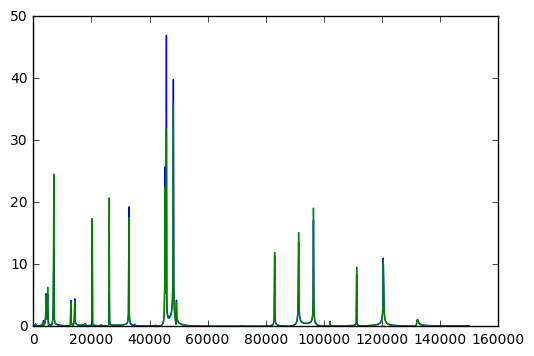

In [36]:
'''plt.semilogy(omega, vw) 
plt.semilogy(omega, vt)
plt.semilogy(omega, vx) 
plt.semilogy(omega, vy)'''
plt.plot(rf(1000)[0],rf(1000)[1])
plt.plot(rf(1000)[0],rf(1000)[2])

C:\Users\Rebeca André\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Users\Rebeca André\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
C:\Users\Rebeca André\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Rebeca André\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Rebeca André\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error 

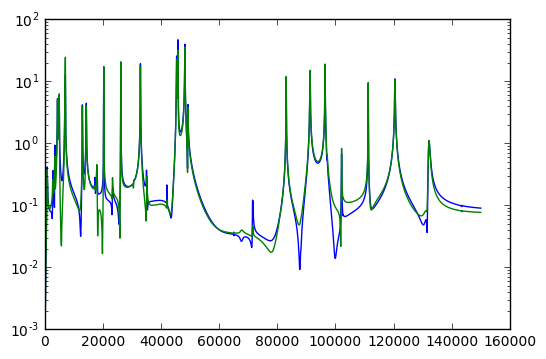

In [38]:
plt.semilogy(rf(1000)[0],rf(1000)[1])
plt.semilogy(rf(1000)[0],rf(1000)[2])

In [37]:
def f(t):
    f = []
    h = sp.linspace(0,(len(M)/4)-1,(len(M)/4))
    s = sp.linspace(0,67,68)
    for k in s:
        f.append(0)
    for n in h:
        m = mt(n)[0][0,0]
        Id = mt(n)[0][2,2]
        Ip = mt(n)[2][2,3]
        f.append(mi*sp.cos(w*t))
        f.append(mi*sp.sin(w*t))
        f.append((1-Id/Ip)*ta*(w**2)*sp.cos(w*t))
        f.append((1-Id/Ip)*ta*(w**2)*sp.sin(w*t))
    return f
    

In [346]:
def Rest(x,t):
    mi = 0.5
    ta = 0.5
    wd = 1430
    A = sp.vstack([sp.hstack([        Z,                 I]),
                           sp.hstack([-Minv @ K, -Minv @ (G*wd + C)])])
    dxdt = A @ x + f(t)
    return dxdt

In [355]:
z0 = sp.linspace(0,0,136)
tf = 60
t = sp.linspace(0, tf, 10000)
sol = odeint(Rest,z0,t)

C:\Users\Rebeca André\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Users\Rebeca André\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
C:\Users\Rebeca André\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Rebeca André\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Rebeca André\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output 

In [361]:
mt(9)[0]

array([[  5.6e+01,   0.0e+00,   0.0e+00,   1.7e-02],
       [  0.0e+00,   5.6e+01,  -1.7e-02,   0.0e+00],
       [  0.0e+00,  -1.7e-02,   3.6e-01,   0.0e+00],
       [  1.7e-02,   0.0e+00,   0.0e+00,   3.6e-01]])

In [348]:
bw = []
fw2 = []
bw2 = []
fw = []
omega = sp.linspace(0, 20000, 50)
'''for n in sp.linspace(0,135,136):
    for w in omega:
        A = sp.vstack([sp.hstack([        Z,                 I]),
                           sp.hstack([-Minv @ K, -Minv @ (G*w + C)])])
        evalues, evects = la.eig(A)
        evalues = sp.sort(evalues.imag)
        wn = (sp.absolute(evalues))
        bw.append(wn[n])
    plt.plot(omega,bw)'''
for w in omega:
    A = sp.vstack([sp.hstack([        Z,                 I]),
                       sp.hstack([-Minv @ K, -Minv @ (G*w + C)])])
    evalues, evects = la.eig(A)
    evalues = sp.sort(evalues.imag)
    wn = (sp.absolute(evalues))
    bw.append(wn[4])
    fw.append(wn[5])
    bw2.append(wn[6])
    fw2.append(wn[7])
    '''bw.append(wn[4])
    fw.append(wn[5])
    bw2.append(wn[6])
    fw2.append(wn[7])'''
'''plt.plot(omega, bw)
plt.plot(omega, fw)
plt.plot(omega, bw2)
plt.plot(omega, fw2)
plt.plot(omega,omega)'''

'plt.plot(omega, bw)\nplt.plot(omega, fw)\nplt.plot(omega, bw2)\nplt.plot(omega, fw2)\nplt.plot(omega,omega)'

In [344]:
len(wn)

136

C:\Users\Rebeca André\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\Rebeca André\Anaconda3\lib\site-packages\matplotlib\ticker.py:1419: RuntimeWarning: overflow encountered in double_scalars
  best_vmin = step * divmod(vmin, step)[0]
C:\Users\Rebeca André\Anaconda3\lib\site-packages\matplotlib\ticker.py:1420: RuntimeWarning: invalid value encountered in double_scalars
  best_vmax = best_vmin + step * nbins
C:\Users\Rebeca André\Anaconda3\lib\site-packages\matplotlib\ticker.py:1424: RuntimeWarning: invalid value encountered in double_scalars
  extra_bins = int(divmod((best_vmax - vmax), step)[0])


ValueError: cannot convert float NaN to integer

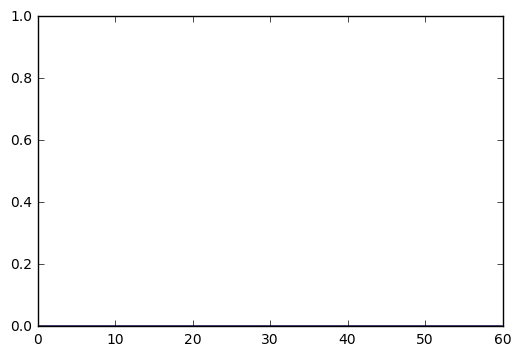

In [45]:
n=9
w=1430
sol = odeint(func, z0, t)
plt.plot(t,sol)